## Prediction of Bank Customer Churn 

**Project Goal**

The aim of this analysis is to understand the factors influencing customer churn in a bank, using a Kaggle sourced dataset. 
Through exploration of features such as customer demographics and financial factors, the aim is to build a predictive model to identify key factors of churn and uncover insights that can help in retaining customers.

SPELLCHECK ALL COMMENTS

**Import Libraries & Data**

In [1056]:
# For Data Manipulation / Numerical Operations
import pandas as pd
import numpy as np
import math as math
from collections import Counter
 
# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score 
 
# For Machine Learning
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.svm import SVC 
 
# For Model Evaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_predict 
 
churn_data = pd.read_csv(r'Churn_Modelling.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1057]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1058]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Data Review & Cleaning**

The data has 10k rows with 14 attributes.
We need to do some basic cleansing.
Further examination is necessary to identify necessary attributes and plan the requisite data manipulation steps before exploratory analysis and modeling.

In [1059]:

# Check for missing values - None found
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [1060]:
churn_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [1061]:
# Drop columns that are not needed. n.b. Removing customer ID as it is not needed for the model evaluation, although would be necessary for customer identification.
churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1062]:
# Organising the columns for ease of use
churn_data_continuous = ['CreditScore',  'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']
churn_data_categorical = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
churn_data = churn_data[['Exited'] + churn_data_categorical + churn_data_continuous]
churn_data.head()

,Exited,HasCrCard,IsActiveMember,Geography,Gender,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts
0,1,1,1,France,Female,619,42,2,0.00,101348.88,1
1,0,0,1,Spain,Female,608,41,1,83807.86,112542.58,1
2,1,1,0,France,Female,502,42,8,159660.80,113931.57,3
3,0,0,0,France,Female,699,39,1,0.00,93826.63,2
4,0,1,1,Spain,Female,850,43,2,125510.82,79084.10,1


**Exploratory Data Analysis & Visualising the Data**

Here we will get an understanding into whether some attributes have a strong relationship with the outcome variable - 'Exited' 

In [1063]:
# Colour Scheme
colors = ['Olive', 'lightcoral']  

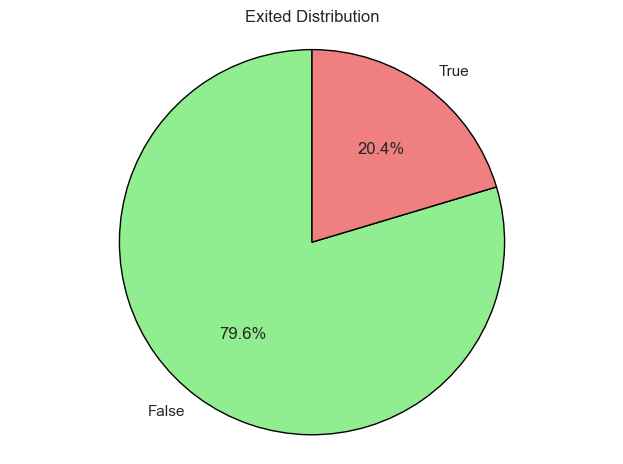

In [1064]:
# Plotting the distribution of Exited
exited = churn_data['Exited'].value_counts()
labels = ['False' if idx == 0 else 'True' for idx in exited.index]
plt.pie(exited, labels=labels, autopct='%1.1f%%', colors=colors
        , startangle=90, wedgeprops={'edgecolor': 'black'})
plt.axis('equal') 
plt.title('Exited Distribution')
plt.tight_layout()
plt.show()

**Categorical Variable Analysis**

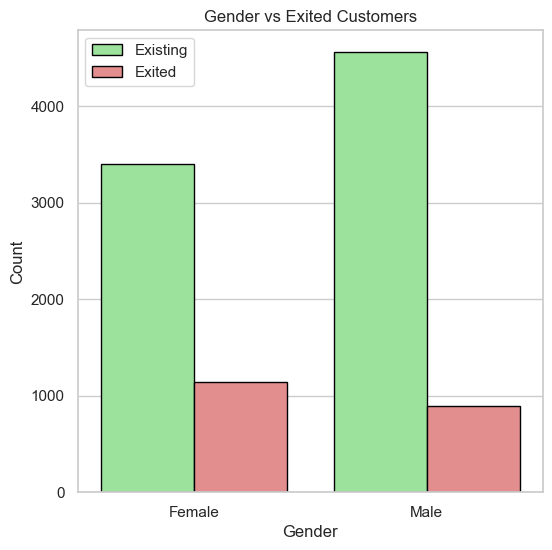

Percentage of Female customers who have exited: 25.07%
Percentage of Male customers who have exited: 16.46%


In [1065]:
# Gender Distribution
sns.set_theme(style="whitegrid",palette=colors)
plt.figure(figsize=(6, 6))
sns.countplot(data=churn_data, x='Gender', hue='Exited',edgecolor='black')
plt.title('Gender vs Exited Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(loc='upper left', labels=['Existing', 'Exited'])
plt.show()

# Calculate the percentage of customers who have exited
total_count = churn_data.groupby('Gender')['Exited'].count()
exit_count = churn_data.groupby('Gender')['Exited'].sum()
percent_exit = (exit_count / total_count) * 100

for gender, percent_exit in percent_exit.items():
    print(f"Percentage of {gender} customers who have exited: {percent_exit:.2f}%")


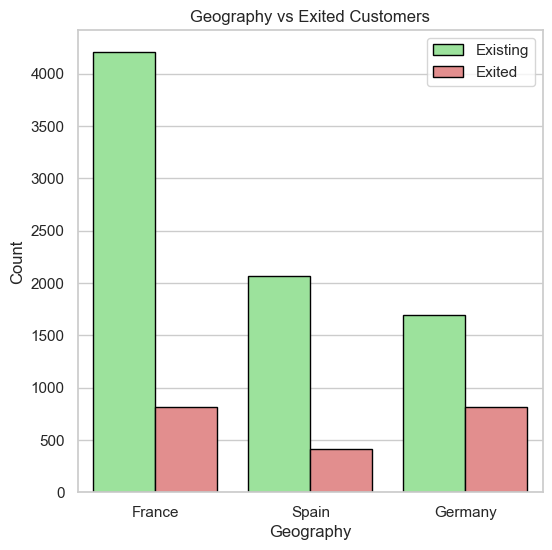

Percentage of customers from France who have exited: 16.15%
Percentage of customers from Germany who have exited: 32.44%
Percentage of customers from Spain who have exited: 16.67%


In [1066]:
# Geography Distribution
sns.set_theme(style="whitegrid",palette=colors)
plt.figure(figsize=(6, 6))
sns.countplot(data=churn_data, x='Geography', hue='Exited',edgecolor='black')
plt.title('Geography vs Exited Customers')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(loc='upper right', labels=['Existing', 'Exited'])
plt.show()

total_count = churn_data.groupby('Geography')['Exited'].count()
exit_count = churn_data.groupby('Geography')['Exited'].sum()
percent_exit = (exit_count / total_count) * 100

for geo, percent_exit in percent_exit.items():
    print(f"Percentage of customers from {geo} who have exited: {percent_exit:.2f}%")

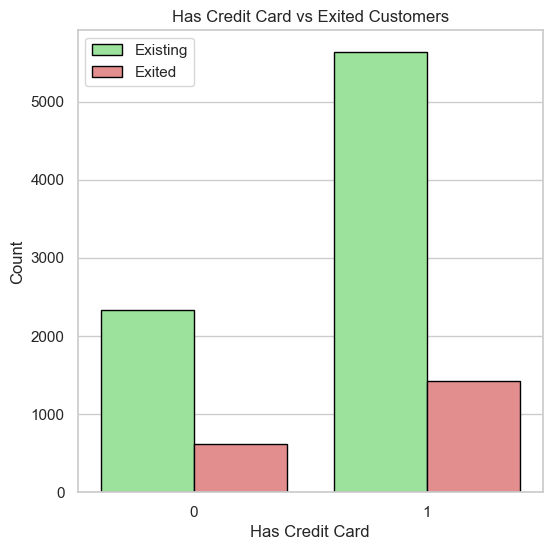

Percentage of customers with HasCrCard 0 who have exited: 20.81%
Percentage of customers with HasCrCard 1 who have exited: 20.18%


In [1067]:
# Distribution of Credit Card Holders
sns.set_theme(style="whitegrid",palette=colors)
plt.figure(figsize=(6, 6))
sns.countplot(data=churn_data, x='HasCrCard', hue='Exited',edgecolor='black')
plt.title('Has Credit Card vs Exited Customers')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.legend(loc='upper left', labels=['Existing', 'Exited'])
plt.show()

total_count = churn_data.groupby('HasCrCard')['Exited'].count()
exit_count = churn_data.groupby('HasCrCard')['Exited'].sum()
percent_exit = (exit_count / total_count) * 100

for i, val in enumerate(percent_exit):
    print(f"Percentage of customers with HasCrCard {i} who have exited: {val:.2f}%")

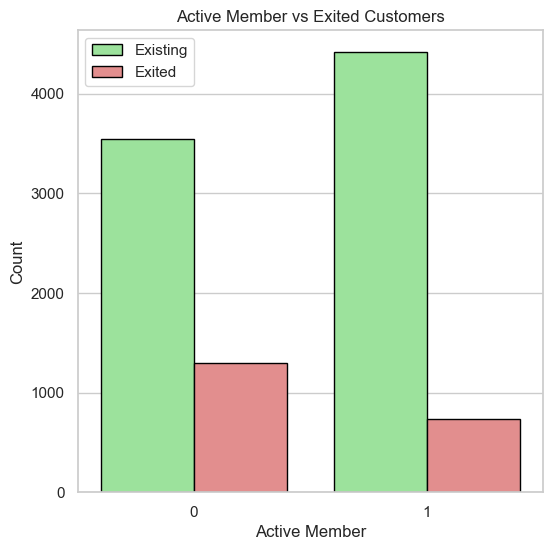

Percentage of Inactive members who have exited: 26.85%
Percentage of Active members who have exited: 14.27%


In [1068]:
# Distribution of Active Members
sns.set_theme(style="whitegrid",palette=colors)
plt.figure(figsize=(6, 6))
sns.countplot(data=churn_data, x='IsActiveMember', hue='Exited',edgecolor='black')
plt.title('Active Member vs Exited Customers')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.legend(loc='upper left', labels=['Existing', 'Exited'])
plt.show()

total_count = churn_data.groupby('IsActiveMember')['Exited'].count()
exit_count = churn_data.groupby('IsActiveMember')['Exited'].sum()
percent_exit = (exit_count / total_count) * 100

for status, percent_exit in percent_exit.items():
    status_label = 'Active' if status == 1 else 'Inactive'
    print(f"Percentage of {status_label} members who have exited: {percent_exit:.2f}%")

**Insights (Catigorical Data)**
* Female customers have a % have a higher exit rate than male customers  
* Customer from Germany have the highest exit %  
* Inactive members are more likely to have exited  
* Although the Exited number is significatly higher for those with a credit card, as proportion the Exited % is the same for those that do not.   

**Numerical/Continious Analysis**

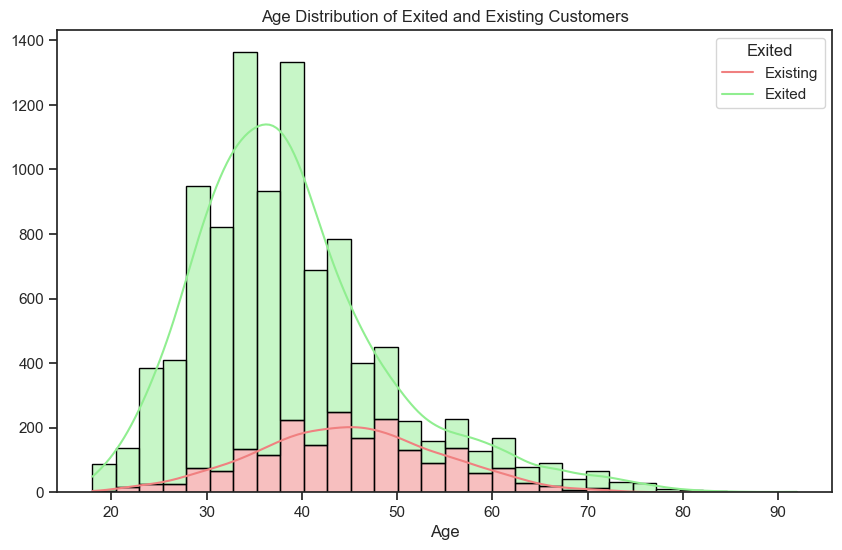

In [1069]:
# Distribution of Age
sns.set_theme(style="whitegrid",palette=colors)
sns.set_style("ticks")
plt.figure(figsize=(10, 6))
sns.histplot(churn_data, x='Age', hue='Exited', multiple='stack', bins=30, kde=True, edgecolor='black')
plt.title('Age Distribution of Exited and Existing Customers')
plt.xlabel('Age')
plt.ylabel('')

plt.legend(title='Exited', loc='upper right', labels=['Existing', 'Exited'])
plt.show()

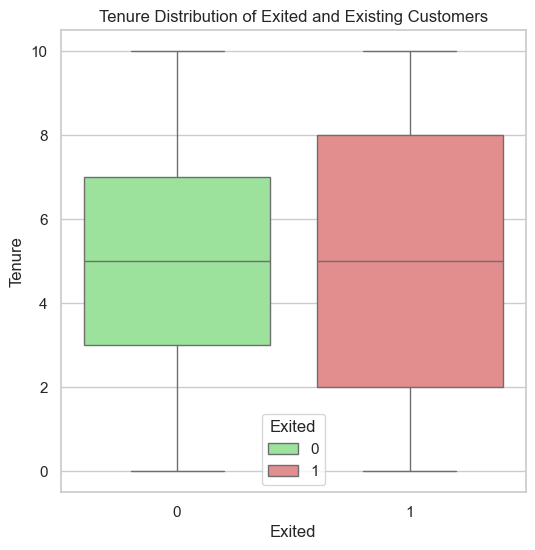

In [1070]:
# Tenure Analysis
sns.set_theme(style="whitegrid", palette=colors)
plt.figure(figsize=(6, 6))
sns.boxplot(data=churn_data, x='Exited', y='Tenure', hue='Exited', palette=colors)
plt.title('Tenure Distribution of Exited and Existing Customers')
plt.xlabel('Exited')
plt.ylabel('Tenure')
plt.show()

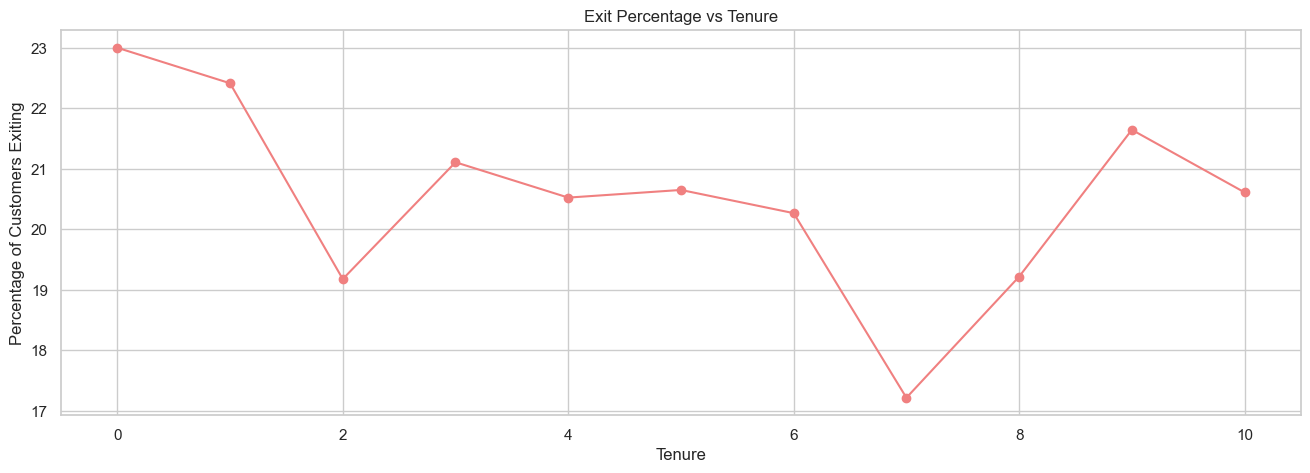

In [1071]:
# Tenure Exit %
sns.set_theme(style="whitegrid", palette=colors)
total_count = churn_data.groupby('Tenure')['Exited'].count()
exit_count = churn_data.groupby('Tenure')['Exited'].sum()
exit_percentage = (exit_count / total_count) * 100


plt.figure(figsize=(16, 5))
exit_percentage.plot(kind='line', marker='o', color='lightcoral')
plt.title('Exit Percentage vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Percentage of Customers Exiting')
plt.show()


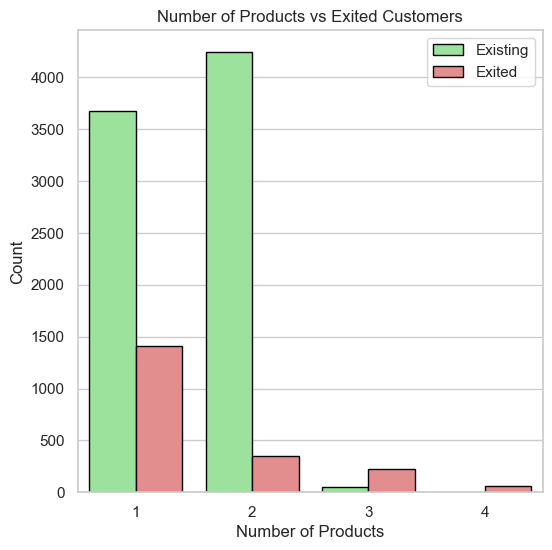

Percentage of customers with 1 product(s) who have exited: 27.71%
Percentage of customers with 2 product(s) who have exited: 7.58%
Percentage of customers with 3 product(s) who have exited: 82.71%
Percentage of customers with 4 product(s) who have exited: 100.00%


In [1072]:
# Number of Products Distribution
sns.set_theme(style="whitegrid",palette=colors)
plt.figure(figsize=(6, 6))
sns.countplot(data=churn_data, x='NumOfProducts', hue='Exited',edgecolor='black')
plt.title('Number of Products vs Exited Customers')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(loc='upper right', labels=['Existing', 'Exited'])
plt.show()

total_count = churn_data.groupby('NumOfProducts')['Exited'].count()
exit_count = churn_data.groupby('NumOfProducts')['Exited'].sum()
percent_exit = (exit_count / total_count) * 100

total_count = churn_data.groupby('NumOfProducts')['Exited'].count()
exit_count = churn_data.groupby('NumOfProducts')['Exited'].sum()
percent_exit = (exit_count / total_count) * 100

for num_products, percent_exit in percent_exit.items():
    print(f"Percentage of customers with {num_products} product(s) who have exited: {percent_exit:.2f}%")

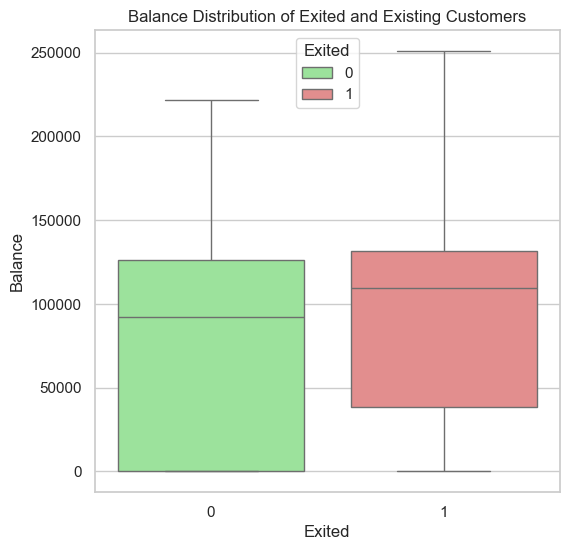

In [1073]:
# Distribution of Balance
sns.set_theme(style="whitegrid", palette=colors)
plt.figure(figsize=(6, 6))
sns.boxplot(data=churn_data, x='Exited', y='Balance', hue='Exited', palette=colors)
plt.title('Balance Distribution of Exited and Existing Customers')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()


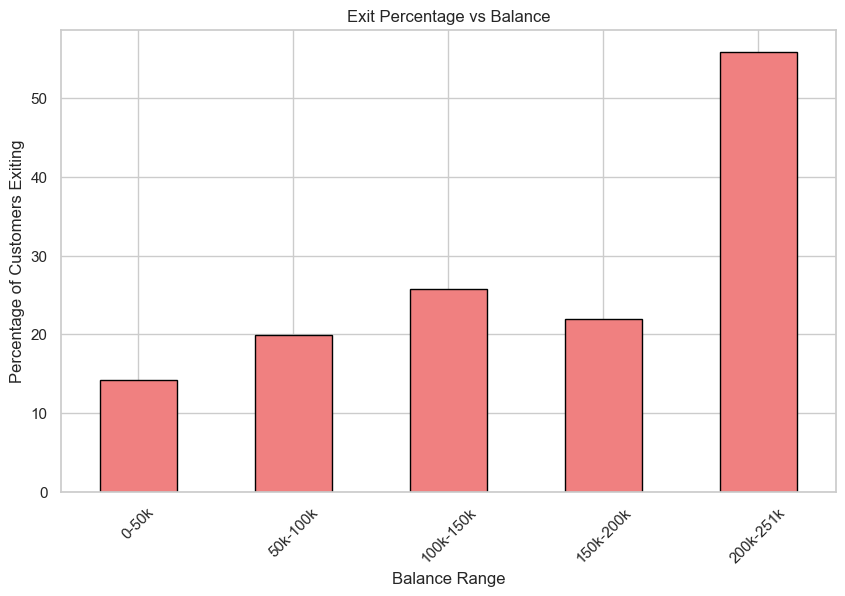

In [1074]:
# Balance Exit %
sns.set_theme(style="whitegrid", palette=colors)
bin_edges = [0, 50000, 100000, 150000, 200000, 251000, ]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-251k', ]

bins = pd.cut(churn_data['Balance'], bins=bin_edges, labels=labels, right=False)
total_count = churn_data.groupby(bins)['Exited'].count()
exit_count = churn_data.groupby(bins)['Exited'].sum()
exit_percentage = (exit_count / total_count) * 100

plt.figure(figsize=(10, 6))
exit_percentage.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Exit Percentage vs Balance')
plt.xlabel('Balance Range')
plt.ylabel('Percentage of Customers Exiting')
plt.xticks(rotation=45)  
plt.show()

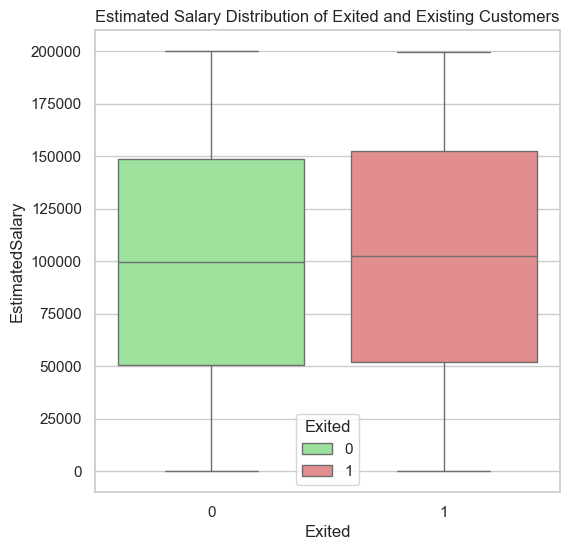

In [1075]:
# Distribution of Estimated Salary
sns.set_theme(style="whitegrid", palette=colors)
plt.figure(figsize=(6, 6))
sns.boxplot(data=churn_data, x='Exited', y='EstimatedSalary', hue='Exited', palette=colors)
plt.title('Estimated Salary Distribution of Exited and Existing Customers')
plt.xlabel('Exited')
plt.ylabel('EstimatedSalary')
plt.show()

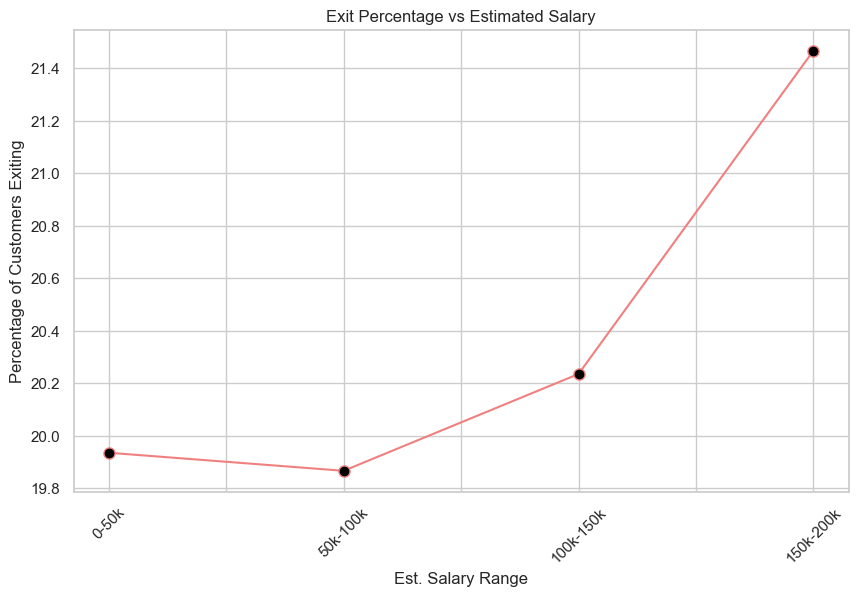

In [1076]:
# Estimated Salary Exit %

sns.set_theme(style="whitegrid", palette=colors)

bin_edges = [0, 50000, 100000, 150000, 200000 ]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k' ]
bins = pd.cut(churn_data['EstimatedSalary'], bins=bin_edges, labels=labels, right=False)

total_count = churn_data.groupby(bins)['Exited'].count()
exit_count = churn_data.groupby(bins)['Exited'].sum()
exit_percentage = (exit_count / total_count) * 100

plt.figure(figsize=(10, 6))
exit_percentage.plot(kind='line', color='lightcoral', marker='o',markerfacecolor='black', markersize=8)
plt.title('Exit Percentage vs Estimated Salary')
plt.xlabel('Est. Salary Range')
plt.ylabel('Percentage of Customers Exiting')
plt.xticks(rotation=45)  
plt.show()

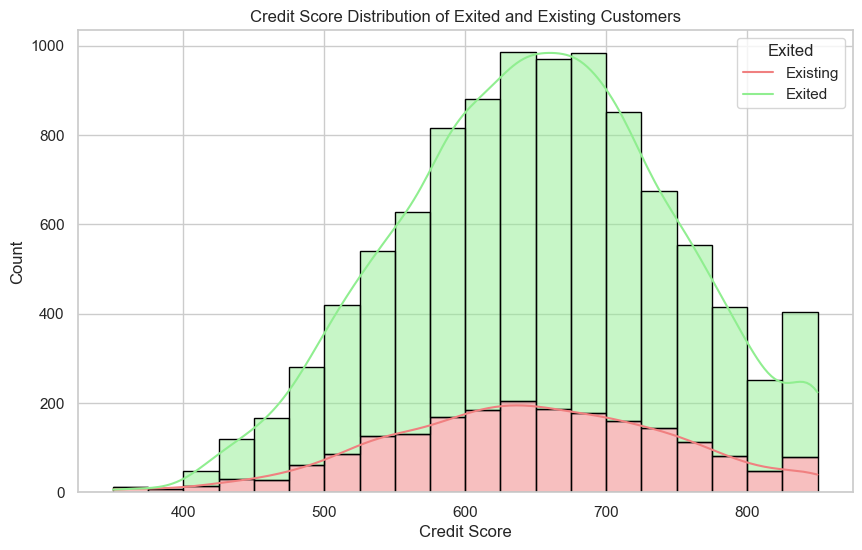

In [1077]:
# Distribution of Credit Score
sns.set_theme(style="whitegrid",palette=colors)
plt.figure(figsize=(10, 6))
sns.histplot(churn_data, x='CreditScore', hue='Exited', multiple='stack', bins=20, kde=True, edgecolor='black')
plt.title('Credit Score Distribution of Exited and Existing Customers')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Existing', 'Exited'])
plt.show()

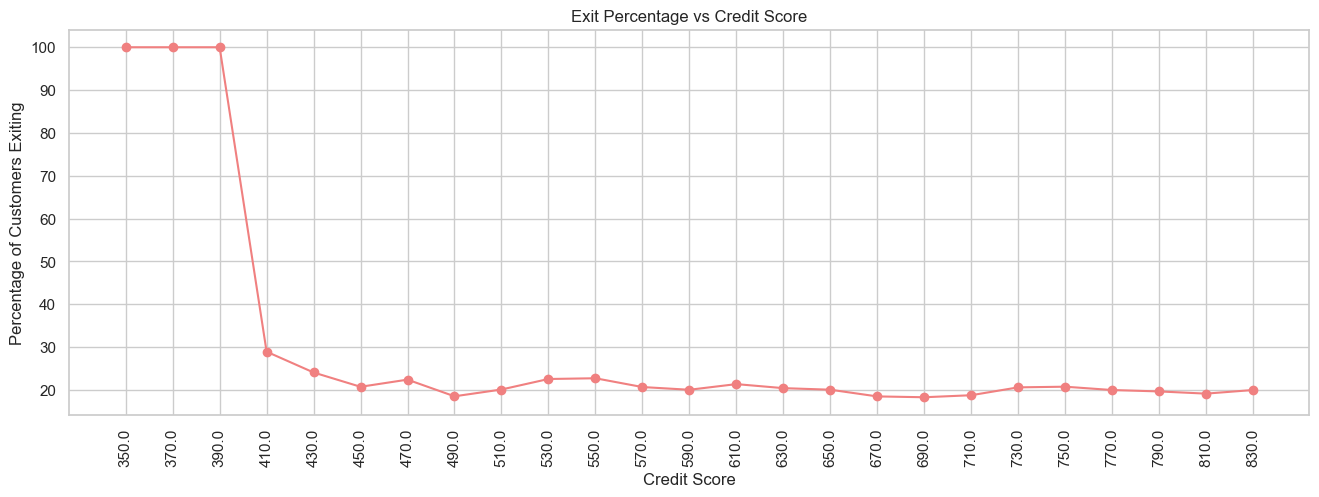

In [1078]:
# Credit Score Exit %
sns.set_theme(style="whitegrid", palette=colors)

bin_edges = np.arange(340, 855, 20)
bins = pd.cut(churn_data['CreditScore'], bins=bin_edges)
total_count = churn_data.groupby(bins)['Exited'].count()
exit_count = churn_data.groupby(bins)['Exited'].sum()
exit_percentage = (exit_count / total_count) * 100

plt.figure(figsize=(16, 5))
exit_percentage.plot(kind='line', marker='o', color='lightcoral')
plt.title('Exit Percentage vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Percentage of Customers Exiting')
plt.xticks(np.arange(len(exit_percentage.index)), [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)], rotation=90)

plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_24584\1449489445.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(churn_data.corr()))
C:\Users\james\AppData\Local\Temp\ipykernel_24584\1449489445.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_data.corr(),annot=True, fmt=".1%", mask=mask, cmap='coolwarm',linewidths=0.5)


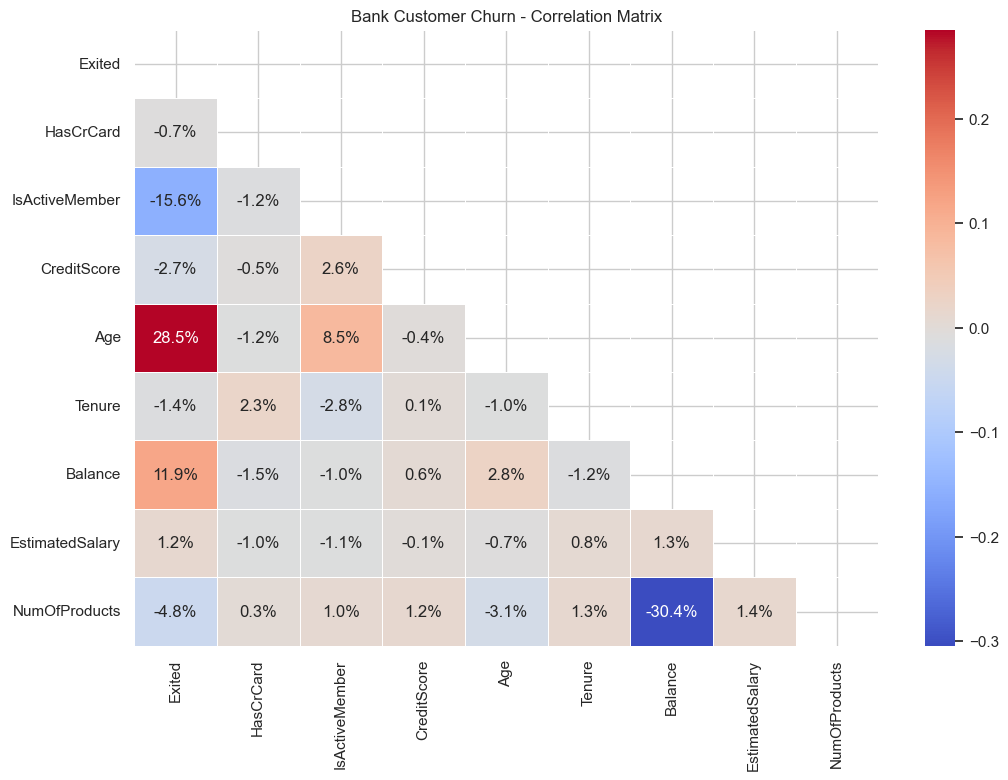

In [1079]:
mask = np.triu(np.ones_like(churn_data.corr()))
plt.figure(figsize=(12, 8))  # Adjust the figure size here
sns.heatmap(churn_data.corr(),annot=True, fmt=".1%", mask=mask, cmap='coolwarm',linewidths=0.5)
plt.title('Bank Customer Churn - Correlation Matrix')
plt.show()

**Insights (Continuous)**

* Age, Balance and IsActiveMember are the three most correlated attributed to Exited.

* The Age distribution curve of exited customers appears to the right of the distribution curve of remaining curstomers - indicating age, specifically a higher age, is indicative of a higher churn likelyhood.

* Customers with a higher number of products have a higher probability of exiting. 

* Customers with lower credit scores (<500) show a slightly higher tendancy to have exited. There is no significant difference in the credit score exit likelyhood above this value.

* Significant bank balances (>200k) show an increased exit percentage.

* Estimated Salary, like balance, show an increased exit percentage in the higher ranges

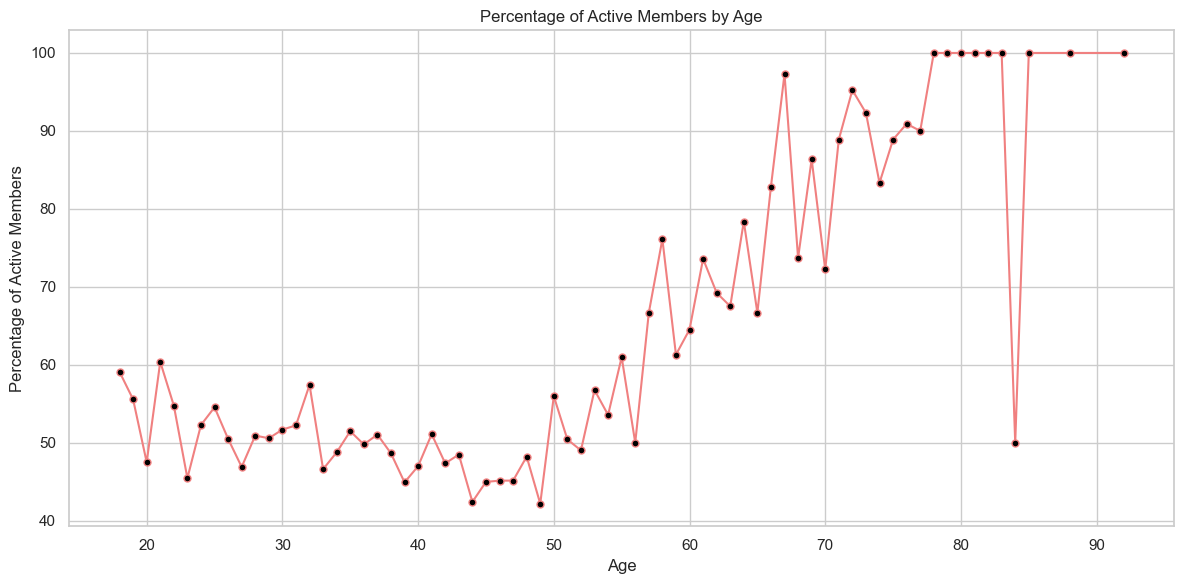

In [1080]:
# Age vs IsActiveMember Correlation

age_groups = churn_data.groupby('Age')['IsActiveMember'].mean() * 100

plt.figure(figsize=(12, 6))
age_groups.plot(kind='line', color='lightcoral', marker='o', markerfacecolor='black', markersize=5)
plt.title('Percentage of Active Members by Age')
plt.xlabel('Age')
plt.ylabel('Percentage of Active Members')
plt.grid(True)
plt.tight_layout()
plt.show()


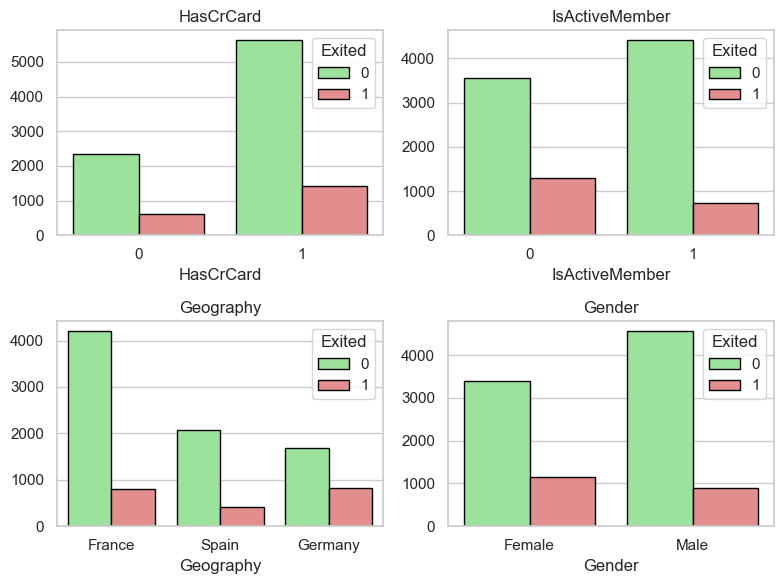

Percentage of customers who exited for 'HasCrCard':
0    20.814941
1    20.184266
dtype: float64

Percentage of customers who exited for 'IsActiveMember':
0    26.850897
1    14.269074
dtype: float64

Percentage of customers who exited for 'Geography':
Geography
France     16.154767
Germany    32.443204
Spain      16.673395
dtype: float64

Percentage of customers who exited for 'Gender':
Female    25.071539
Male      16.455928
dtype: float64



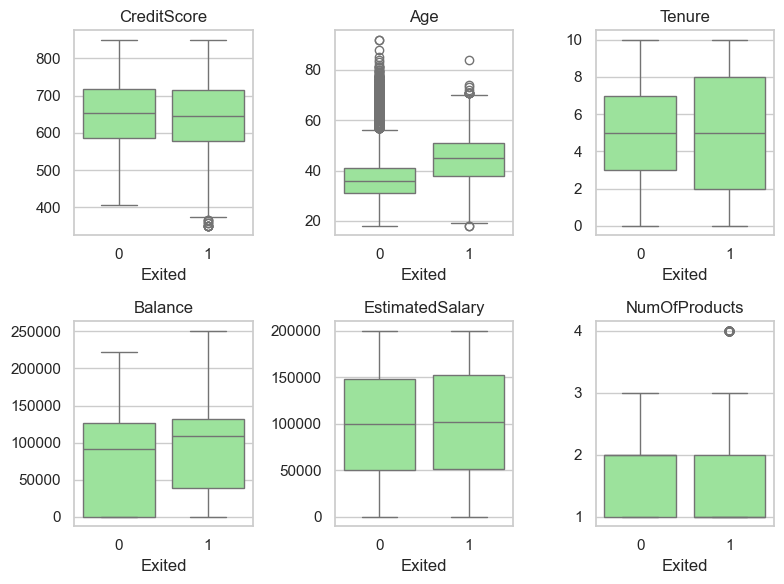

Summary statistics for 'CreditScore':
         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0

Summary statistics for 'Age':
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0

Summary statistics for 'Tenure':
         count      mean       std  min  25%  50%  75%   max
Exited                                                      
0       7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0

Summary statistics for 'Balance':
         count          mean           std  min       

In [1081]:
# *All data attributes - for assignment 

plt.figure(figsize=(8, 6))
for i, column in enumerate(churn_data_categorical, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, hue='Exited', data=churn_data,edgecolor='black')
    plt.ylabel('')
    plt.title(column)
plt.tight_layout()
plt.show()

for column in churn_data_categorical:
    total_counts = churn_data[column].value_counts()
    exited_counts = churn_data.groupby(column)['Exited'].sum()
    percentages = (exited_counts / total_counts) * 100
    print(f"Percentage of customers who exited for '{column}':")
    print(percentages)
    print()

plt.figure(figsize=(8, 6))
for i, column in enumerate(churn_data_continuous, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Exited', y=column, data=churn_data)
    plt.ylabel('')
    plt.title(column)
plt.tight_layout()
plt.show()

for column in churn_data_continuous:
    print(f"Summary statistics for '{column}':")
    print(churn_data.groupby('Exited')[column].describe())
    print()


Intesting to see percentage of 'Is Active Member' vs. Age falls as one appaches 50, then stongly increases after that age. Perhaps life stage related.

**Feature Engineering**

* Number of Products has a maximum of 4 products, where #3 and #4 have very low frequencies - Create a 'SingleProduct' 1/0 atrribute instead
* Adding a balance to salary ratio
* Rescaling the Features - Standardisation Scaling

In [1082]:
# Create SingleProduct attribute & Drop NumOfProducts Column
churn_data['SingleProduct'] = churn_data['NumOfProducts'].apply(lambda x: 1 if x > 1 else 0)
churn_data.drop('NumOfProducts', axis=1, inplace=True)
churn_data_continuous.remove('NumOfProducts')
# Create BalanceSalaryRatio attribute
churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / churn_data['EstimatedSalary']

churn_data.head()

,Exited,HasCrCard,IsActiveMember,Geography,Gender,CreditScore,Age,Tenure,Balance,EstimatedSalary,SingleProduct,BalanceSalaryRatio
0,1,1,1,France,Female,619,42,2,0.00,101348.88,0,0.000000
1,0,0,1,Spain,Female,608,41,1,83807.86,112542.58,0,0.744677
2,1,1,0,France,Female,502,42,8,159660.80,113931.57,1,1.401375
3,0,0,0,France,Female,699,39,1,0.00,93826.63,1,0.000000
4,0,1,1,Spain,Female,850,43,2,125510.82,79084.10,0,1.587055


In [1083]:
# One hot encode the categorical variables
categorical_variables = ['Geography', 'Gender']

# Use pandas' get_dummies function to one-hot encode the categorical variables
churn_data_encoded = pd.get_dummies(churn_data[categorical_variables], drop_first=True)

churn_data = pd.concat([churn_data, churn_data_encoded], axis = 1)

# No need...
#churn_data.loc[churn_data.HasCrCard == 0, 'HasCrCard'] = -1
#churn_data.loc[churn_data.IsActiveMember == 0, 'IsActiveMember'] = -1
#churn_data.loc[churn_data.SingleProduct == 0, 'SingleProduct'] = -1
#churn_data.loc[churn_data.Geography_Germany == 0, 'Geography_Germany'] = -1
#churn_data.loc[churn_data.Geography_Spain == 0, 'Geography_Spain'] = -1
#churn_data.loc[churn_data.Gender_Male == 0, 'Gender_Male'] = -1

churn_data.drop(categorical_variables, axis=1, inplace=True)
churn_data.head()


,Exited,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,EstimatedSalary,SingleProduct,BalanceSalaryRatio,Geography_Germany,Geography_Spain,Gender_Male
0,1,1,1,619,42,2,0.00,101348.88,0,0.000000,0,0,0
1,0,0,1,608,41,1,83807.86,112542.58,0,0.744677,0,1,0
2,1,1,0,502,42,8,159660.80,113931.57,1,1.401375,0,0,0
3,0,0,0,699,39,1,0.00,93826.63,1,0.000000,0,0,0
4,0,1,1,850,43,2,125510.82,79084.10,0,1.587055,0,1,0


In [1084]:

# Scale the numerical columns
scaler = StandardScaler()

# Fit and transform the numerical columns using the scaler
churn_data[churn_data_continuous] = scaler.fit_transform(churn_data[churn_data_continuous])

churn_data.head()

,Exited,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,EstimatedSalary,SingleProduct,BalanceSalaryRatio,Geography_Germany,Geography_Spain,Gender_Male
0,1,1,1,-0.326221,0.293517,-1.041760,-1.225848,0.021886,0,0.000000,0,0,0
1,0,0,1,-0.440036,0.198164,-1.387538,0.117350,0.216534,0,0.744677,0,1,0
2,1,1,0,-1.536794,0.293517,1.032908,1.333053,0.240687,1,1.401375,0,0,0
3,0,0,0,0.501521,0.007457,-1.387538,-1.225848,-0.108918,1,0.000000,0,0,0
4,0,1,1,2.063884,0.388871,-1.041760,0.785728,-0.365276,0,1.587055,0,1,0


**Splitting Data into Training & Test Datasets**

In [1085]:
X = churn_data.drop('Exited', axis=1)  # Features
y = churn_data['Exited']  # Target variable

In [1086]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [1087]:


model_logR = LogisticRegression()

# Fitting the model on the training data
model_logR.fit(X_train, y_train)

# Predicting on the test data
logR_y_pred = model_logR.predict(X_test)

# Calculating the accuracy
logistic_regression_accuracy = accuracy_score(y_test, logR_y_pred)
print("Accuracy of the Logistic Regression model:", logistic_regression_accuracy)


# Generating the classification report
logR_class_report = classification_report(y_test, logR_y_pred)
print("\nClassification Report:")
print(logR_class_report)



Accuracy of the Logistic Regression model: 0.817

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1607
           1       0.58      0.24      0.34       393

    accuracy                           0.82      2000
   macro avg       0.71      0.60      0.62      2000
weighted avg       0.79      0.82      0.78      2000



**Random Forest**

In [1088]:


model_RanFst = RandomForestClassifier( n_estimators=100,criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,)
model_RanFst.fit(X_train, y_train)

RF_y_pred = model_RanFst.predict(X_test)


# Calculating the accuracy
randon_forest_accuracy = accuracy_score(y_test, RF_y_pred)
print("Accuracy of the Random Forest model:", randon_forest_accuracy)


# Generating the classification report
RF_class_report = classification_report(y_test, RF_y_pred)
print("\nClassification Report:")
print(RF_class_report)


Accuracy of the Random Forest model: 0.8475

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.70      0.39      0.50       393

    accuracy                           0.85      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.85      0.83      2000



**XBG Classifier**

In [1089]:


model_xgb=XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=8)

model_xgb.fit(X_train,y_train)

xgb_y_pred=model_xgb.predict(X_test)

# Calculating the accuracy
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("Accuracy of the XGBClassifier:", xgb_accuracy)

# Generating the classification report
xgb_class_report = classification_report(y_test, xgb_y_pred)
print("\nClassification Report:")
print(xgb_class_report)


Accuracy of the XGBClassifier: 0.8325

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1607
           1       0.60      0.44      0.51       393

    accuracy                           0.83      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



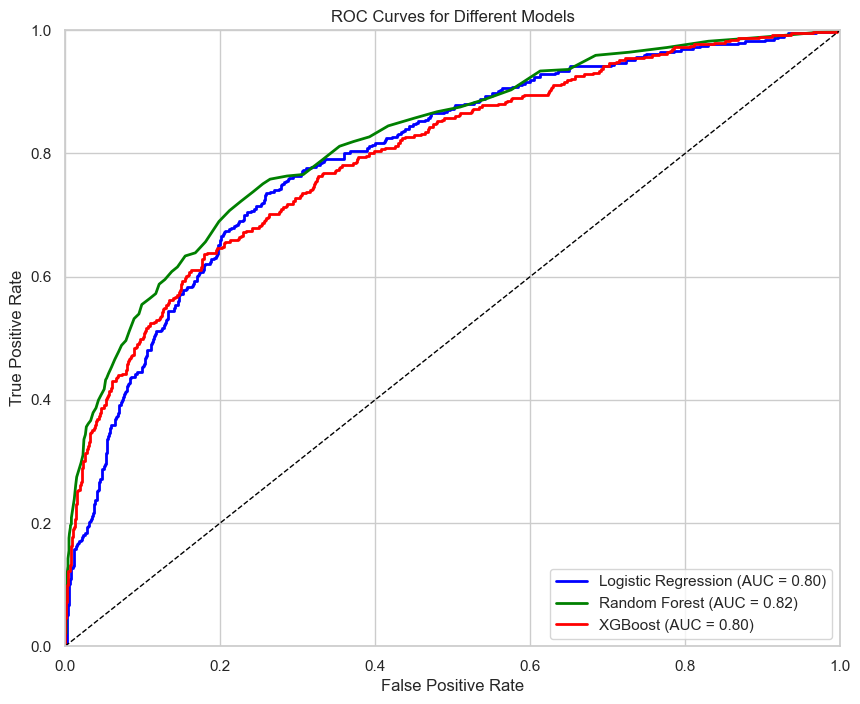

In [1090]:

# Initialize models
model_lr = model_logR
model_rf = model_RanFst
model_xgb = model_xgb

# Initialize figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for Logistic Regression
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# Plot ROC curve for Random Forest
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot ROC curve for XGBoost
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot 'you get it right 50% of the time' line
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


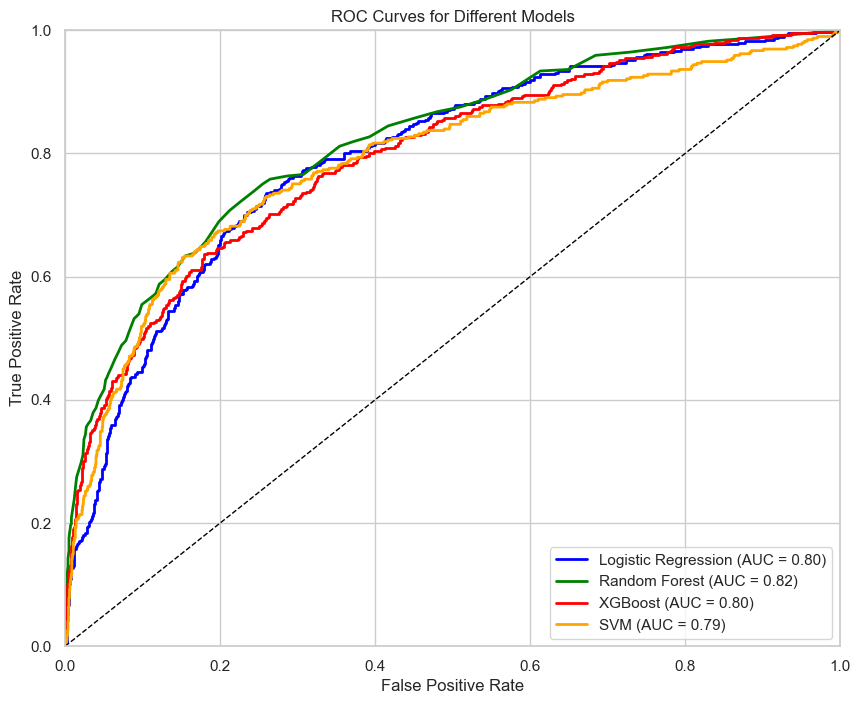

In [1091]:
from sklearn.svm import SVC

# Initialize models
model_lr = model_logR
model_rf = model_RanFst
model_xgb = model_xgb
model_svm = SVC(probability=True)  # Initialize SVM model

# Fit SVM model
model_svm.fit(X_train, y_train)

# Initialize figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for Logistic Regression
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# Plot ROC curve for Random Forest
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot ROC curve for XGBoost
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot ROC curve for SVM
y_pred_proba_svm = model_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label=f'SVM (AUC = {auc_svm:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



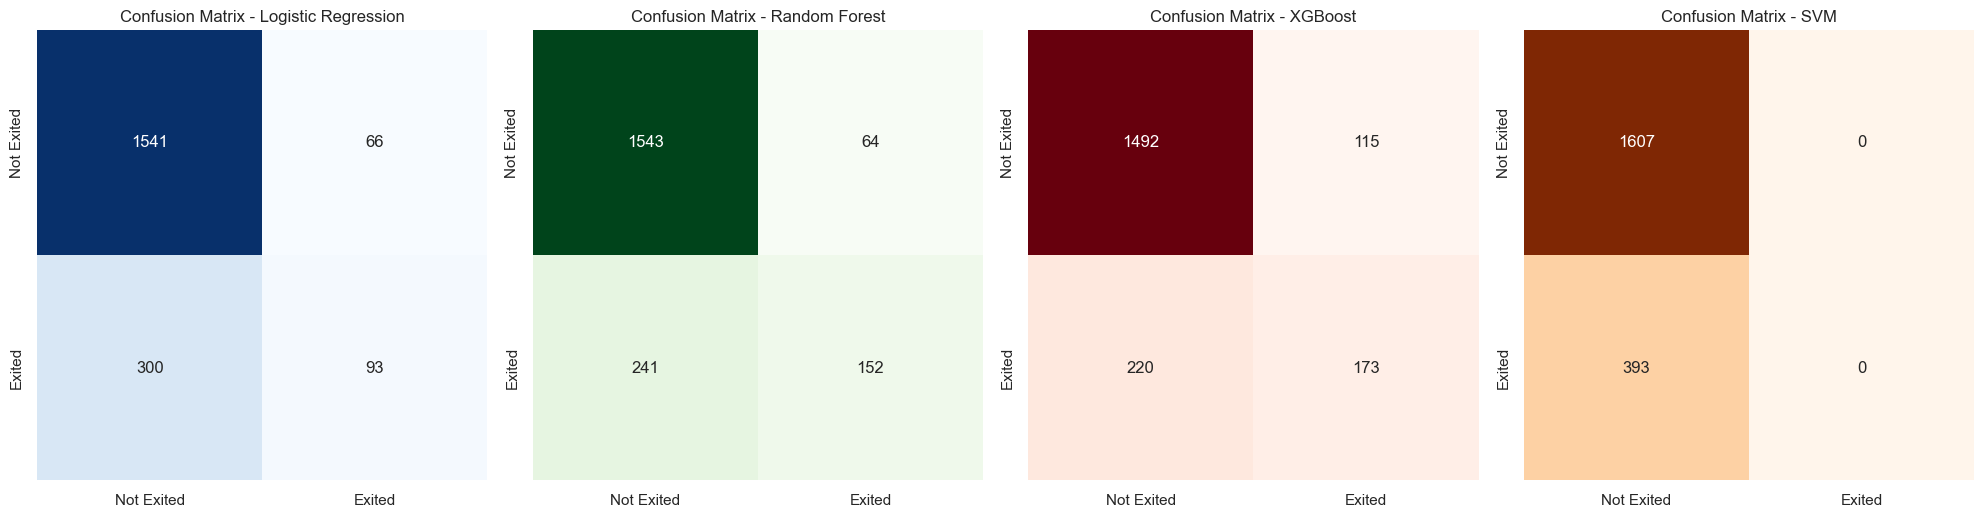

In [1092]:
from sklearn.svm import SVC

# Initialize models
model_lr = model_logR
model_rf = model_RanFst
model_xgb = model_xgb
model_svm = SVC()  # Initialize SVM model

# Fit SVM model
model_svm.fit(X_train, y_train)

# Initialize figure
plt.figure(figsize=(20, 5))

# Plot confusion matrix for Logistic Regression
plt.subplot(1, 4, 1)
lr_cm = confusion_matrix(y_test, model_lr.predict(X_test))
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='d', cbar=False, square=True,
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Logistic Regression')

# Plot confusion matrix for Random Forest
plt.subplot(1, 4, 2)
rf_cm = confusion_matrix(y_test, model_rf.predict(X_test))
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='d', cbar=False, square=True,
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Random Forest')

# Plot confusion matrix for XGBoost
plt.subplot(1, 4, 3)
xgb_cm = confusion_matrix(y_test, model_xgb.predict(X_test))
sns.heatmap(xgb_cm, annot=True, cmap='Reds', fmt='d', cbar=False, square=True,
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - XGBoost')

# Plot confusion matrix for SVM
plt.subplot(1, 4, 4)
svm_cm = confusion_matrix(y_test, model_svm.predict(X_test))
sns.heatmap(svm_cm, annot=True, cmap='Oranges', fmt='d', cbar=False, square=True,
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - SVM')

plt.tight_layout()
plt.show()



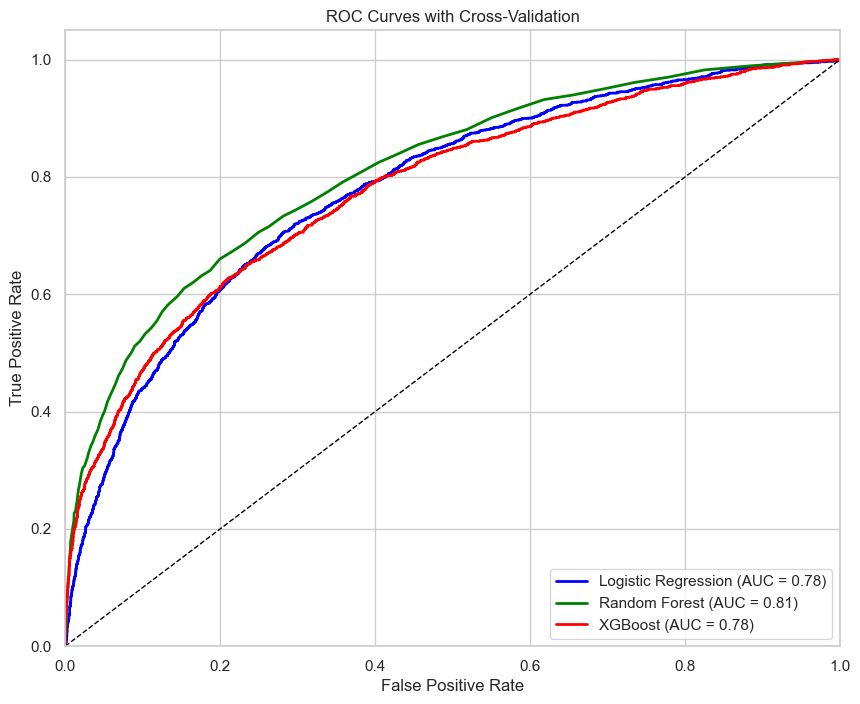

In [1093]:

# Initialize models
model_lr = model_logR
model_rf = model_RanFst
model_xgb = model_xgb

# Perform cross-validation and obtain predicted probabilities
y_pred_proba_lr = cross_val_predict(model_lr, X_train, y_train, cv=5, method='predict_proba')[:, 1]
y_pred_proba_rf = cross_val_predict(model_rf, X_train, y_train, cv=5, method='predict_proba')[:, 1]
y_pred_proba_xgb = cross_val_predict(model_xgb, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_train, y_pred_proba_lr)
auc_lr = roc_auc_score(y_train, y_pred_proba_lr)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_train, y_pred_proba_rf)
auc_rf = roc_auc_score(y_train, y_pred_proba_rf)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_train, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_train, y_pred_proba_xgb)

# Initialize figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for Logistic Regression
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot ROC curve for XGBoost
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with Cross-Validation')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [1094]:


from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter
 
# Separate features and target variable
X = churn_data.drop(columns=['Exited'])
y = churn_data['Exited']
 
# Display class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))
 
# Initialize oversampler (choose one)
#oversampler = RandomOverSampler()  # Random Oversampling
oversampler = SMOTE()  # SMOTE (Synthetic Minority Over-sampling Technique)
# oversampler = ADASYN()  # ADASYN (Adaptive Synthetic Sampling)
 
# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)
 
# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))
 
 
 
# Combine resampled features and target variable into a new DataFrame
churn_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Exited')], axis=1)

Class distribution before oversampling: Counter({0: 7963, 1: 2037})
Class distribution after oversampling: Counter({1: 7963, 0: 7963})


In [1095]:


# Initialize models
model_lr = LogisticRegression()
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
model_xgb = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=8)
model_svm = SVC(probability=True)

# Fit models
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_svm.fit(X_train, y_train)

# Predictions
lr_pred = model_lr.predict(X_test)
rf_pred = model_rf.predict(X_test)
xgb_pred = model_xgb.predict(X_test)
svm_pred = model_svm.predict(X_test)

# Calculate accuracies
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Generate classification reports
lr_report = classification_report(y_test, lr_pred, output_dict=True)
rf_report = classification_report(y_test, rf_pred, output_dict=True)
xgb_report = classification_report(y_test, xgb_pred, output_dict=True)
svm_report = classification_report(y_test, svm_pred, output_dict=True)

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy],
    'Precision (0)': [lr_report['0']['precision'], rf_report['0']['precision'], xgb_report['0']['precision'], svm_report['0']['precision']],
    'Precision (1)': [lr_report['1']['precision'], rf_report['1']['precision'], xgb_report['1']['precision'], svm_report['1']['precision']],
    'Recall (0)': [lr_report['0']['recall'], rf_report['0']['recall'], xgb_report['0']['recall'], svm_report['0']['recall']],
    'Recall (1)': [lr_report['1']['recall'], rf_report['1']['recall'], xgb_report['1']['recall'], svm_report['1']['recall']],
    'F1-score (0)': [lr_report['0']['f1-score'], rf_report['0']['f1-score'], xgb_report['0']['f1-score'], svm_report['0']['f1-score']],
    'F1-score (1)': [lr_report['1']['f1-score'], rf_report['1']['f1-score'], xgb_report['1']['f1-score'], svm_report['1']['f1-score']],
})

# Print results DataFrame
print(results_df)



                 Model  Accuracy  Precision (0)  Precision (1)  Recall (0)  \
0  Logistic Regression    0.8170       0.837045       0.584906    0.958930   
1        Random Forest    0.8505       0.867829       0.711712    0.960174   
2              XGBoost    0.8325       0.871495       0.600694    0.928438   
3                  SVM    0.8035       0.803500       0.000000    1.000000   

   Recall (1)  F1-score (0)  F1-score (1)  
0    0.236641      0.893852      0.336957  
1    0.402036      0.911669      0.513821  
2    0.440204      0.899066      0.508076  
3    0.000000      0.891045      0.000000  


C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

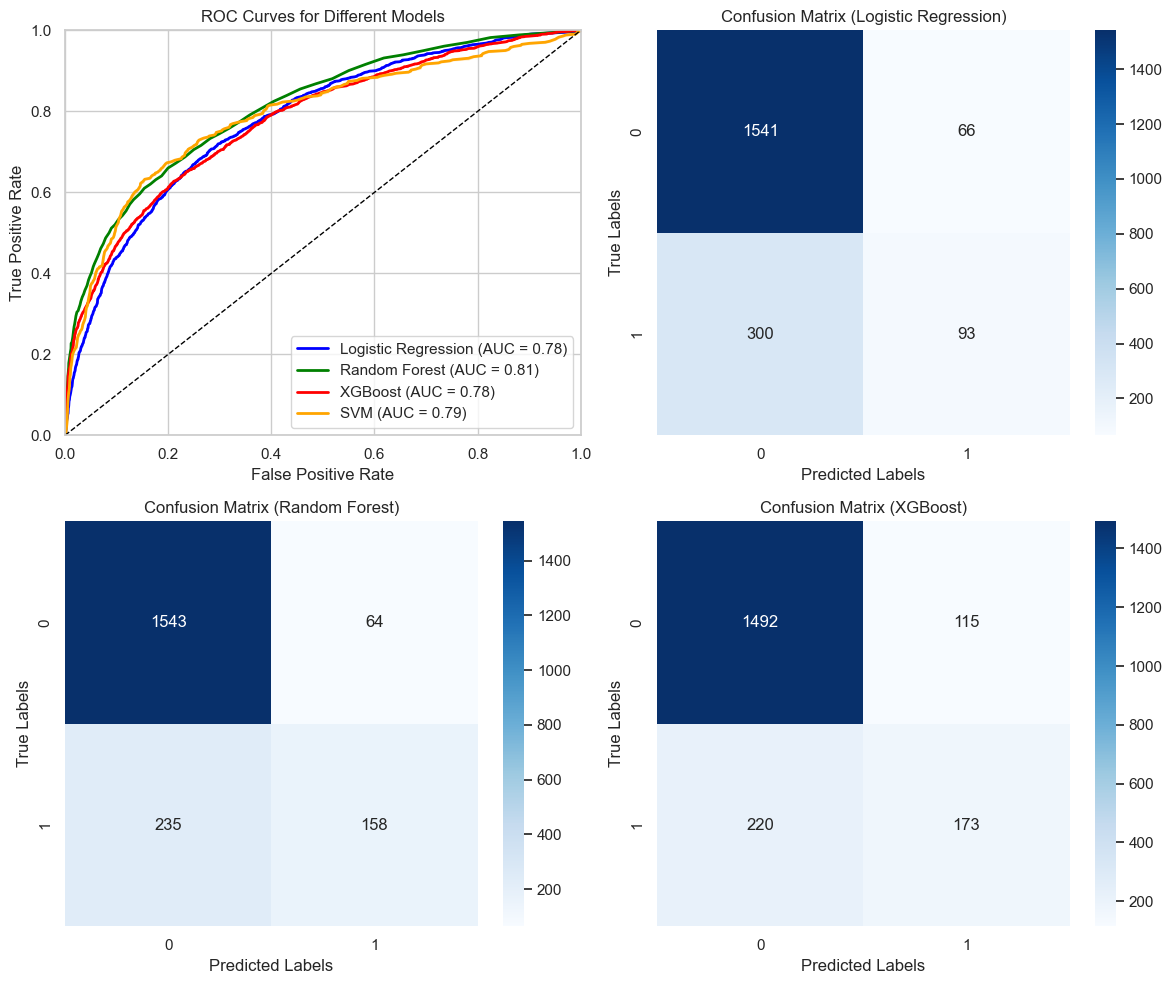

In [1096]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialize the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot ROC curve for Logistic Regression
sns.lineplot(ax=axes[0, 0], x=fpr_lr, y=tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# Plot ROC curve for Random Forest
sns.lineplot(ax=axes[0, 0], x=fpr_rf, y=tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot ROC curve for XGBoost
sns.lineplot(ax=axes[0, 0], x=fpr_xgb, y=tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot ROC curve for SVM
sns.lineplot(ax=axes[0, 0], x=fpr_svm, y=tpr_svm, color='orange', lw=2, label=f'SVM (AUC = {auc_svm:.2f})')

# Plot random guess line
axes[0, 0].plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# Set plot attributes
axes[0, 0].set_xlim([0.0, 1.0])
axes[0, 0].set_ylim([0.0, 1.0])
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curves for Different Models')
axes[0, 0].legend(loc='lower right')
axes[0, 0].grid(True)

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues', fmt='g', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix (Logistic Regression)')
axes[0, 1].set_xlabel('Predicted Labels')
axes[0, 1].set_ylabel('True Labels')

# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Blues', fmt='g', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix (Random Forest)')
axes[1, 0].set_xlabel('Predicted Labels')
axes[1, 0].set_ylabel('True Labels')

# Confusion Matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, cmap='Blues', fmt='g', ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix (XGBoost)')
axes[1, 1].set_xlabel('Predicted Labels')
axes[1, 1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()




Result Of EDA¶
Gender:
The churn rate for female customers is significantly higher (25.07%) compared to male customers (16.47%). This suggests that gender may play a role in customer churn, with female customers being more likely to churn.

Geography:
The churn rates vary by geography. Germany has the highest churn rate (32.44%), followed by Spain (16.67%) and France (16.17%). This indicates that customers from different countries may have varying tendencies to churn, with German customers having the highest likelihood of churning.

Number of Products:
The number of products a customer holds is also associated with churn. Customers with 4 products have a 100% churn rate, but this group is relatively small, so the result may not be representative. Customers with 1 product have a relatively high churn rate (27.71%), indicating that those with fewer products are more likely to churn. However, customers with 2 products have a lower churn rate (7.60%).

Credit Score:
The average credit score is slightly lower for churned customers (645.41) compared to those who did not churn (651.84). While there is a small difference, it may suggest that customers with slightly lower credit scores are more likely to churn.

Card Type:
Churn rates do not show significant differences among different card types (DIAMOND, GOLD, SILVER, PLATINUM). This implies that the type of card does not strongly influence customer churn in this dataset.

Tenure:
The churn rates by tenure indicate that customers with a tenure of 0 months have the highest churn rate at 23.00%, while customers with a tenure of 7 months have the lowest churn rate at 17.22%. Overall, there is variation in churn rates across different tenure periods, with shorter tenures generally exhibiting higher churn rates.

Balance:
Churned customers have a higher average balance (91109.48) compared to those who did not churn (72742.75). This suggests that customers with higher account balances are more likely to churn, which might be counterintuitive.

Age:¶
Churned customers have a slightly higher average age (44.84) compared to those who did not churn (37.41). This implies that older customers are slightly more likely to churn, though the difference is not substantial.

Complaint:
Customers who made a complaint (Complaint: 1) have an extremely high churn rate (99.51%) compared to those with no complaint (Complaint: 0, 0.05%). This indicates that customers who express dissatisfaction through complaints are almost guaranteed to churn.

Tenure
The churn rates by tenure indicate that customers with a tenure of 0 months have the highest churn rate at 23.00%, while customers with a tenure of 7 months have the lowest churn rate at 17.22%. Overall, there is variation in churn rates across different tenure periods, with shorter tenures generally exhibiting higher churn rates.

